In [1]:
import sys

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import *
from os import path
from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib.lines import Line2D

In [8]:
ica_data = load_json_model(os.path.join('..','data','cgu.json.gz'))

In [3]:
ica_data.sample_table.to_csv(os.path.join('..','data','sample.csv'))

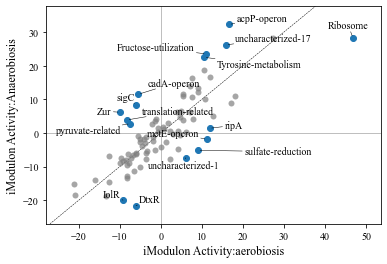

In [3]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-13h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-13h-2-Stuttgart",table=True,threshold=10)
dima.set_xlabel("iModulon Activity:aerobiosis",fontsize=12)
dima.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)

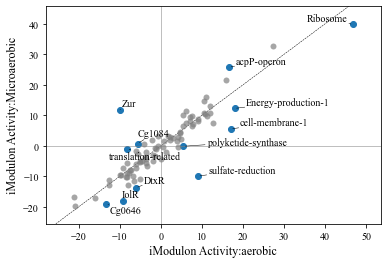

In [20]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-9h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-7h-2-Stuttgart",table=True,threshold=5.5)
dima.set_xlabel("iModulon Activity:aerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Microaerobic",fontsize=12)

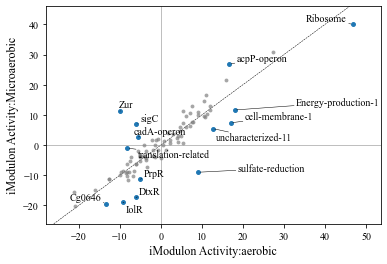

In [5]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-3h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-9h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))
dima,table = plot_dima(ica_data,"altering-oxygen:JL-3h-2-Stuttgart","altering-oxygen:JL-9h-2-Stuttgart",table=True,threshold=6,show_labels="auto",scatter_kwargs={'s':15})
dima.set_xlabel("iModulon Activity:aerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Microaerobic",fontsize=12)
plt.show()

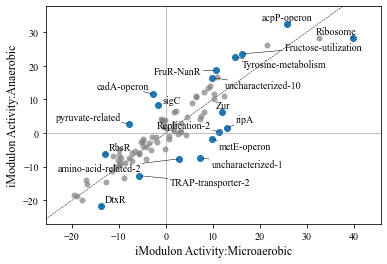

In [32]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-7h-2-Stuttgart"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="JL-13h-2-Stuttgart"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"altering-oxygen:JL-7h-2-Stuttgart","altering-oxygen:JL-13h-2-Stuttgart",table=True,threshold=5.5)
dima.set_xlabel("iModulon Activity:Microaerobic",fontsize=12)
dima.set_ylabel("iModulon Activity:Anaerobic",fontsize=12)

                      difference    pvalue    qvalue
Zur                    21.188237  0.000203  0.007084
sigC                   12.897311  0.000331  0.007084
acpP-operon            10.128338  0.005074  0.025966
cadA-operon             8.159172  0.001686  0.014667
translation-related     7.215440  0.000932  0.009014
NrtR                    5.781303  0.002098  0.016592
Replication-3           5.654153  0.007989  0.033099
Fructose-utilization    5.529660  0.003233  0.021635
uncharacterized-17      5.504078  0.026350  0.069468
uncharacterized-10      5.330689  0.034792  0.086484
Cg0646                 -6.010081  0.011687  0.044209
Cg0800                 -6.331208  0.045274  0.094121
Energy-production-1    -6.357585  0.021653  0.062795
Ribosome               -6.820861  0.044272  0.094121
uncharacterized-11     -7.207204  0.006844  0.033081
cell-membrane-1        -9.671534  0.000677  0.008415
IolR                   -9.723188  0.014343  0.048077
DtxR                  -11.306377  0.000872  0.

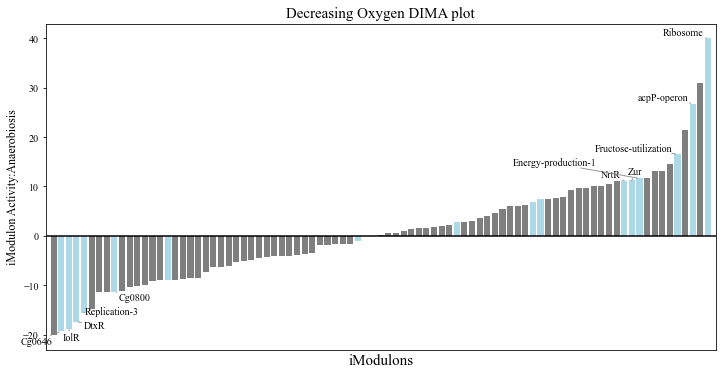

In [5]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "altering-oxygen:JL-3h-2-Stuttgart"
diff_condition = "altering-oxygen:JL-9h-2-Stuttgart"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

                           difference        pvalue        qvalue
Zur                         20.475340  2.273804e-04  3.297016e-03
HutC                        12.169084  7.394085e-14  6.432854e-12
Cg1084                      11.514221  5.360831e-04  5.182137e-03
sulfate-reduction            9.348027  8.365514e-03  3.611568e-02
Fructose-utilization         8.975223  9.765512e-04  8.495996e-03
TcsR                         8.111791  9.574384e-10  2.776571e-08
polyketide-synthase          7.815205  1.151129e-02  3.993595e-02
uncharacterized-15           6.980092  2.550826e-02  5.690305e-02
cell-membrane-1              6.388319  2.248547e-03  1.630196e-02
PcaO                         6.299818  4.490045e-04  4.882924e-03
SigD-operon                  6.250462  3.192299e-03  1.983786e-02
Energy-production-1          5.975836  2.407506e-02  5.512162e-02
FruR-NanR                    5.924553  1.193488e-02  3.993595e-02
Tyrosine-metabolism          5.201476  1.377752e-02  4.088022e-02
acpP-opero

([], [])

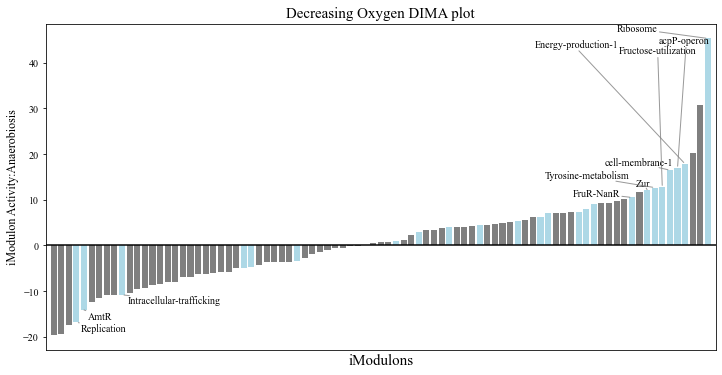

In [12]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "differing-in-growth-rates-lackP:P2_R1_T1_p"
diff_condition = "differing-in-growth-rates-lackP:P4-R1-T28_p"
threshold = 4

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

                     difference        pvalue        qvalue
Zur                   20.684885  2.197391e-04  4.779326e-03
Cg1084                10.677074  6.546454e-04  8.136307e-03
TcsR                   8.875029  3.442527e-10  1.497499e-08
HutC                   7.254921  2.675816e-10  1.497499e-08
SG_9                   6.323937  5.058886e-03  3.182349e-02
acpP-operon            5.401911  1.532064e-02  5.795199e-02
Signal-transduction   -6.063898  1.039797e-02  4.644624e-02
Ribosome              -8.381130  3.516626e-02  8.051224e-02
NrtR                 -10.020936  3.940994e-04  6.857329e-03


([], [])

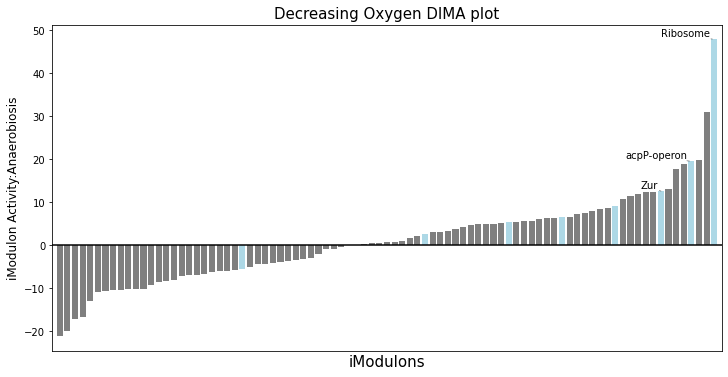

In [11]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "differing-in-growth-rates-lackP:P2_R1_T3_p"
diff_condition = "differing-in-growth-rates-lackP:P3-R1-T26_p"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
print(table)
fig,ax = plt.subplots(figsize=[12,6])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["reference_condition"]==diff_condition.split(":")[1]].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif "uncharacterized" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey") 
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,87],[0,0],color="black")
ax.set_xlim([-1,87])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("iModulon Activity:Anaerobiosis",fontsize=12)
ax.set_title("Decreasing Oxygen DIMA plot",fontsize=15)
plt.xticks([])

In [42]:
activity_data

DtxR                 -21.600579
IolR                 -19.975207
Cg0646               -18.818624
uncharacterized-12   -18.415047
Replication-3        -15.202030
                        ...    
Growth-related        23.503771
uncharacterized-17    26.191077
uncharacterized-15    28.109128
Ribosome              28.351247
acpP-operon           32.256386
Length: 87, dtype: float64

In [33]:
time_groups = ica_data.sample_table.groupby(["project","condition"])
time_projects = {}
for i, j in time_groups:
    if 'altering-oxygen' in i[0]:
        time_projects.update({i:list(j.index)})
print(time_projects)
time_points = [3,5,7,9,11,13]
oxygen = []
hypoxia_A = pd.DataFrame(index=ica_data.A.index)

for i,j in time_projects.items():
#     oxygen.append(float(i[1].split("_")[1]))
    hypoxia_A[i[0]+":"+i[1]] = ica_data.A[j].mean(axis=1)
    
hypoxia_A["mean"] =  abs(hypoxia_A.mean(axis=1))
hypoxia_A = hypoxia_A.sort_values("mean",ascending=False)
hypoxia_A.drop(columns="mean",inplace=True)

hypoxia_A



{('altering-oxygen', 'JL-11h-2-Stuttgart'): ['ERR2401413'], ('altering-oxygen', 'JL-13h-2-Stuttgart'): ['ERR2401414'], ('altering-oxygen', 'JL-3h-2-Stuttgart'): ['ERR2401409'], ('altering-oxygen', 'JL-5h-2-Stuttgart'): ['ERR2401410'], ('altering-oxygen', 'JL-7h-2-Stuttgart'): ['ERR2401411'], ('altering-oxygen', 'JL-9h-2-Stuttgart'): ['ERR2401412']}


,altering-oxygen:JL-11h-2-Stuttgart,altering-oxygen:JL-13h-2-Stuttgart,altering-oxygen:JL-3h-2-Stuttgart,altering-oxygen:JL-5h-2-Stuttgart,altering-oxygen:JL-7h-2-Stuttgart,altering-oxygen:JL-9h-2-Stuttgart
Ribosome,40.696207,28.351247,46.792735,48.165285,39.811624,39.971874
uncharacterized-15,30.558384,28.109128,27.264560,29.145152,32.613762,30.920515
acpP-operon,29.561764,32.256386,16.668030,18.006228,25.779861,26.796368
uncharacterized-17,22.353123,26.191077,15.959936,17.109875,21.450768,21.464015
uncharacterized-12,-21.091008,-18.415047,-20.990035,-18.809260,-19.615283,-20.061642
...,...,...,...,...,...,...
SG_9,2.301844,2.721195,-2.064047,-0.509097,1.771624,1.782083
mepA-deletion,-3.308532,1.369545,-0.694373,-1.358475,0.092495,-1.612671
WblB,2.283470,3.434084,-1.345618,-0.212103,-0.605768,0.010411
amino-acid-related-2,-2.592575,-7.646768,2.246458,1.541725,2.881519,0.582241


In [34]:
import pandas as pd
hypoxia_A = pd.read_csv(os.path.join('..','data','different-DO.csv'),index_col = 0)

In [36]:
groups = ica_data.sample_table.groupby(["project","condition"])
activity_means = pd.DataFrame()
for i,j in groups:
    if "altering-oxygen" in i:
        print(i)
        activity_means[str(i[1]).split("_")[0]]= (ica_data.A[j.index].mean(axis=1))
        
max_val = []
for i,row in activity_means.iterrows():
    max_val.append(max(row))
activity_means["max"] = max_val
activity_means = activity_means.sort_values("max",ascending=False)
activity_means.drop(columns="max",inplace=True)
activity_means.head()

('altering-oxygen', 'JL-11h-2-Stuttgart')
('altering-oxygen', 'JL-13h-2-Stuttgart')
('altering-oxygen', 'JL-3h-2-Stuttgart')
('altering-oxygen', 'JL-5h-2-Stuttgart')
('altering-oxygen', 'JL-7h-2-Stuttgart')
('altering-oxygen', 'JL-9h-2-Stuttgart')


,JL-11h-2-Stuttgart,JL-13h-2-Stuttgart,JL-3h-2-Stuttgart,JL-5h-2-Stuttgart,JL-7h-2-Stuttgart,JL-9h-2-Stuttgart
Ribosome,40.696207,28.351247,46.792735,48.165285,39.811624,39.971874
uncharacterized-15,30.558384,28.109128,27.264560,29.145152,32.613762,30.920515
acpP-operon,29.561764,32.256386,16.668030,18.006228,25.779861,26.796368
uncharacterized-17,22.353123,26.191077,15.959936,17.109875,21.450768,21.464015
Growth-related,17.726513,23.503771,11.019883,12.342017,16.155402,16.549542


In [37]:
activity_means = hypoxia_A
activity_means.head()

,ERR2401409,ERR2401410,ERR2401411,ERR2401412,ERR2401413,ERR2401414
polyketide-synthase,2.505429,3.720535,-3.153280,-2.375372,-1.516965,0.819653
copper-utilization,-1.832747,-1.609622,-0.609286,-0.447224,0.533405,3.965474
peroxide-stress,2.981537,3.673457,-1.328223,-0.093214,0.554818,-5.788375
Cg0725,-0.329375,-0.314058,-0.485595,-0.474026,-0.445173,2.048227
YqjI,-1.091033,-1.204450,0.298310,0.526594,0.187266,1.283312


In [ ]:
fig,[ax2,ax1] = plt.subplots(2,1,figsize=[15,10])
timepoints = [3,5,7,9,11,13]
imod = ["DtxR","IolR","cadA-operon","sigC","acpP-operon","FruR-NanR","cell-membrane-1","ripA"
        ,"sulfate-reduction","Ribosome"]
legend = []

for i in activity_means.index:
    if i in imod:
        ax1.plot(timepoints, activity_means.loc[i])
        legend.append(i)
        
ax1.plot([40,40],[-15,25],linestyle="--", color = "tab:grey")
ax1.plot([54,54],[-15,25],linestyle="--", color = "tab:grey")
ax1.plot([114.5,114.5],[-15,25],linestyle="--", color = "tab:grey")
ax1.set_ylim([-15,25])
ax1.set_xlim([3,13])
ax1.set_title("Hypoxia Timecourse",fontsize = 15)
ax1.set_ylabel("Activity",fontsize = 15)

ax2.plot(time_points,oxygen)
ax2.plot(time_points,oxygen,"o",color="tab:red",markersize=7)
ax2.plot([40,40],[-1,1],linestyle="--", color = "tab:grey")
ax2.plot([54,54],[-1,1],linestyle="--", color = "tab:grey")
ax2.plot([114.5,114.5],[-1,1],linestyle="--", color = "tab:grey")
ax2.set_ylim([-.1,.9])
ax2.set_xlim([0,121])
ax2.set_title("Dissolved Oxygen Concentration Timecourse",fontsize=15)
ax1.set_xlabel("Time (H)",fontsize = 15)
ax2.set_ylabel("% Dissolved Oxygen",fontsize = 15)

ax1.legend(legend)

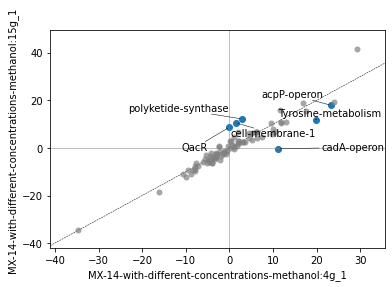

In [18]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="4g_1"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="15g_1"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"MX-14-with-different-concentrations-methanol:4g_1","MX-14-with-different-concentrations-methanol:15g_1",table=True,threshold=5)

In [ ]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="4g_1"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="15g_1"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"MX-14-with-different-concentrations-methanol:4g_1","MX-14-with-different-concentrations-methanol:15g_1",table=True,threshold=5)

In [67]:
imodulon_gene = {}
for index,row in ica_data.imodulon_table.iterrows():
    gene_table = []
    for index2,row2 in ica_data.view_imodulon(index).iterrows():
        gene_table.append(ica_data.view_imodulon(index).loc[index2,"gene_name"])
    imodulon_gene[index]=gene_table
print(len(imodulon_gene))

87


In [68]:
imodulon_gene.keys()

dict_keys(['polyketide-synthase', 'copper-utilization', 'peroxide-stress', 'Cg0725', 'YqjI', 'PcaO', 'histidine-biosynthetic', 'IolR', 'proline-transport', 'SufR', 'SG_1', 'Zur', 'Cg1084', 'amino-acid-related-2', 'Growth-related', 'sigD-operon', 'Energy-production-1', 'SG_2', 'PdxR', 'Aromatic-degradation', 'Thiamine-metabolism', 'SG_3', 'SG_4', 'uncharacterized-1', 'Signal-transduction', 'Intracellular-trafficking', 'cell-membrane-1', 'uncharacterized-2', 'SG_5', 'SG_6', 'ripA', 'Cg0646', 'TcsR', 'KmtR', 'Ribosome', 'NrtR', 'uncharacterized-3', 'uncharacterized-4', 'SG_7', 'SG_8', 'ArgR', 'uncharacterized-5', 'ArsR', 'AmtR', 'uncharacterized-6', 'Cg3249', 'acpP-operon', 'FruR-NanR', 'uncharacterized-7', 'TRAP-transporter', 'Replication', 'RbsR', 'TRAP-transporter-2', 'Replication-2', 'redox-related', 'Cg0800', 'uncharacterized-8', 'uncharacterized-9', 'lipid-metabolism', 'uncharacterized-10', 'Replication-3', 'sigC', 'uncharacterized-11', 'DtxR', 'metE-operon', 'amino-acid-related', '

In [69]:
import xlwt
wb = xlwt.Workbook(encoding='utf8')
ws = wb.add_sheet('worksheet')
i=0
for key,value in imodulon_gene.items():
    k = 0
    ws.write(i,k,key)
    k = k+1
    for gene in value:
        ws.write(i,k,gene)
        k = k+1
    i = i+1
wb.save(r"E:/test/imodulon_gene_table-2.csv")

In [65]:
for key,value in imodulon_gene.items():
    for i in value:
        print(i)

birA
cg0815
purK
fas-IB
WA5_RS04200
cg0961
cg2745
cg2746
cg2747
cg2748
cg2750
cg2751
rph
WA5_RS12495
ctpA
cg0465
cg0466
cg3287
WA5_RS14885
cg3290
WA5_RS16245
cg3291
cg3293
cg3414
cg2186
cg2187
cg2188
secY
cgtS7
cgtR7
cg0712
cg0713
cg0714
ubiA
crtYf
crtYe
crtI2
crtB2
cg0722
crtE
cg0725
cg0726
cg0727
phr
cg0730
cg0732
cg0733
cg0735
cg0736
cg0737
dnaE2
cg0740
sirR
cg0742
cg0745
cg0747
cg0748
spoU
folD
cg0824
WA5_RS03590
cg0828
cg0829
cg0830
cg0831
cg0832
cg0833
cg0834
msiK2
cg0836
cg0838
cg0839
cg0840
cg0841
cg0842
cg0843
cg0844
cg0845
cg0847
cg1019
WA5_RS16450
cg1020
cg1021
WA5_RS15650
dld
WA5_RS04520
WA5_RS15655
cg1032
cg1033
cg1176
cg1178
cg1179
WA5_RS05170
cg1182
cg1183
cg1185
cg1187
WA5_RS05200
cg1190
cg1191
cg1192
cg1193
cg1194
cg1197
cg1198
cg1199
WA5_RS05250
WA5_RS16265
cg1202
cg1203
cg1204
cg1205
cg1206
cg1207
cg1208
phnA
cg1211
cg1212
cg0692
cg1214
cg1227
cg1293
cg1294
cg1295
cg1296
cg1302
cg1303
WA5_RS05740
cg1305
cg1624
aspA
cg2320
cg2321
cg2322
treY
cg2324
WA5_RS10535
cg2328


In [28]:
ica_data.view_imodulon("SufR")

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
WA5_RS07795,0.190451,sufS,NC_020519.1,WA5_1500,1648096,1649361,-,cysteine desulfurase,Amino acid transport and metabolism,H7C6A3,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07800,0.228565,sufC,NC_020519.1,WA5_1501,1649363,1650121,-,Fe-S cluster assembly ATPase SufC,"Post-translational modification, protein turno...",R0HW43,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07805,0.278019,sufD,NC_020519.1,WA5_1502,1650245,1651423,-,Fe-S cluster assembly protein SufD,"Post-translational modification, protein turno...",A0A516S8V1,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07810,0.278535,sufB,NC_020519.1,WA5_1503,1651429,1652874,-,Fe-S cluster assembly protein SufB,"Post-translational modification, protein turno...",NaN,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07815,0.264523,sufR,NC_020519.1,WA5_1504,1652890,1653576,-,transcriptional regulator,Transcription,A0A1B4WLI9,Op970,"WA5_RS01525,WA5_RS03810,WA5_RS07815,WA5_RS0956..."
WA5_RS07820,0.240989,mptB,NC_020519.1,WA5_1505,1653898,1655673,+,polyprenol phosphomannose-dependent alpha 1%2C...,Function unknown,NaN,Op971,WA5_RS01525
